In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shai-level-2-training-2023/sample_submission.csv
/kaggle/input/shai-level-2-training-2023/train.csv
/kaggle/input/shai-level-2-training-2023/test/237487502.jpeg
/kaggle/input/shai-level-2-training-2023/test/578242651.jpeg
/kaggle/input/shai-level-2-training-2023/test/111993936.jpeg
/kaggle/input/shai-level-2-training-2023/test/491589162.jpeg
/kaggle/input/shai-level-2-training-2023/test/545163486.jpeg
/kaggle/input/shai-level-2-training-2023/test/267373811.jpeg
/kaggle/input/shai-level-2-training-2023/test/460439802.jpeg
/kaggle/input/shai-level-2-training-2023/test/69490724.jpeg
/kaggle/input/shai-level-2-training-2023/test/280574781.png
/kaggle/input/shai-level-2-training-2023/test/200701465.jpeg
/kaggle/input/shai-level-2-training-2023/test/425716630.jpeg
/kaggle/input/shai-level-2-training-2023/test/137560586.jpeg
/kaggle/input/shai-level-2-training-2023/test/256199202.png
/kaggle/input/shai-level-2-training-2023/test/372851859.jpeg
/kaggle/input/shai-level-2-training

# Step [1]: Prepare libraries and data

## [1.1] Include important libraries

In [2]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
#from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten,
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten ,Activation,Dropout,GlobalAveragePooling2D
from keras import applications
from keras.applications.resnet import ResNet50
from keras.optimizers import SGD, Adam

## [1.2] Read data

In [3]:
def load_image(norm_path,label):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array([label]*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

In [4]:
def load_image_test(norm_path):
    norm_files = np.array(os.listdir(norm_path))
   # norm_labels = np.array([label]*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
        image = cv2.imread(norm_path + image)
        image = cv2.resize(image, dsize=(200,200))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images

In [5]:
norm_images, norm_labels = load_image('/kaggle/input/shai-level-2-training-2023/train/normal/',0)

100%|██████████| 468/468 [00:17<00:00, 26.93it/s]


In [6]:
covid_images, covid_labels = load_image('/kaggle/input/shai-level-2-training-2023/train/covid/',1)

100%|██████████| 295/295 [00:07<00:00, 38.84it/s]


In [7]:
virus_images, virus_labels = load_image('/kaggle/input/shai-level-2-training-2023/train/virus/',2)

100%|██████████| 433/433 [00:08<00:00, 50.64it/s]


In [8]:
X_test = load_image_test('/kaggle/input/shai-level-2-training-2023/test/')

100%|██████████| 513/513 [00:13<00:00, 37.61it/s]


In [9]:
virus_images.shape

(433, 200, 200)

In [10]:
X_train=[]
X_train.append(norm_images[:])
X_train.append(covid_images[:])
X_train.append(virus_images[:])

In [11]:
y_train = []
y_train.append(norm_labels)
y_train.append(covid_labels)
y_train.append(virus_labels)

In [12]:
len(X_train)

3

In [13]:
print(y_train)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [14]:
train_dir = '/kaggle/input/shai-level-2-training-2023/train'
test_dir = '/kaggle/input/shai-level-2-training-2023/test'

In [15]:
train = pd.read_csv('/kaggle/input/shai-level-2-training-2023/train.csv')

In [16]:
train.head()

,Image,Label
0,597631776.jpeg,normal
1,35266064.jpeg,virus
2,467414642.jpeg,normal
3,35667640.jpeg,normal
4,618841263.jpeg,normal


# Step [2]: Visulization #

In [17]:
from sklearn.preprocessing import LabelEncoder
Ln=LabelEncoder().fit(train['Label'])

In [18]:
cases_count = train['Label'].value_counts()
print(cases_count)

normal    468
virus     433
covid     295
Name: Label, dtype: int64


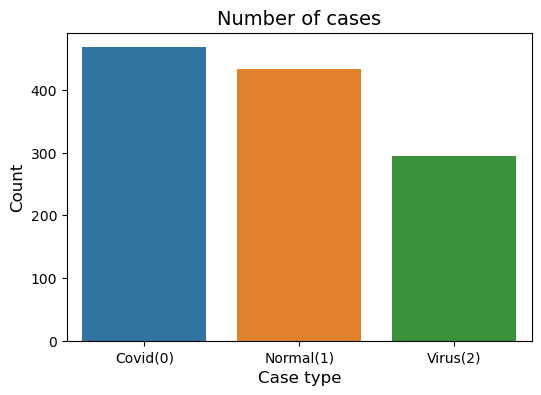

In [19]:
# Plot the results 
plt.figure(figsize=(6,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Covid(0)','Normal(1)','Virus(2)'])
plt.show()

In [20]:
covid_samples = (train[train['Label']==0]['Image'].iloc[:10]).tolist()
normal_samples = (train[train['Label']==1]['Image'].iloc[:10]).tolist()
virus_samples = (train[train['Label']==2]['Image'].iloc[:10]).tolist()

# Step [3]: DataGenerator

In [21]:
image_size = 224 
BATCH_SIZE = 64


train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=15,
        fill_mode="nearest")


training_set = train_datagen.flow_from_directory(train_dir,
                                                 subset='training',
                                                 target_size = (image_size, image_size),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical',
                                                  seed=42,
                                                 shuffle=True)

validation_set = train_datagen.flow_from_directory(train_dir,
    subset='validation',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',seed=42,
    shuffle=True)

Found 958 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [22]:
y_train = training_set.classes 
y_val = validation_set.classes
print(training_set.class_indices)

{'covid': 0, 'normal': 1, 'virus': 2}


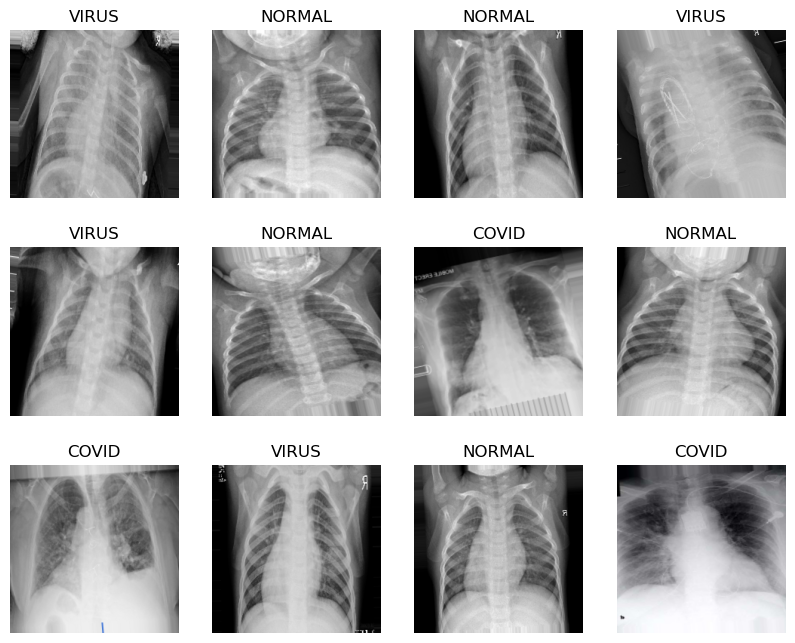

In [23]:
labels = ['COVID', 'NORMAL', 'VIRUS']

sample_data = training_set.__getitem__(0)[0] 
sample_label = training_set.__getitem__(0)[1] 

plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.axis('off')
    plt.imshow(sample_data[i])
    plt.title(labels[np.argmax(sample_label[i])])

# Step [4]: Build Baseline

In [60]:
from keras.backend import clear_session
clear_session()

# Step [4:1]: CNN Model

In [69]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(layers.Activation(activations.relu))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32,(3,3)))
model.add(layers.Activation(activations.relu))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(layers.Activation(activations.relu))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense( 3, activation='softmax'))

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

In [71]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())

In [72]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [73]:
history =model.fit_generator(training_set,epochs=7,validation_data=validation_set,callbacks=[early_stop])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/7
15/15 [==============================] - 40s 2s/step - loss: 1.2170 - accuracy: 0.4113 - val_loss: 0.9668 - val_accuracy: 0.3908
Epoch 2/7
15/15 [==============================] - 34s 2s/step - loss: 0.8280 - accuracy: 0.6200 - val_loss: 0.8835 - val_accuracy: 0.5420
Epoch 3/7
15/15 [==============================] - 34s 2s/step - loss: 0.6818 - accuracy: 0.6827 - val_loss: 0.6112 - val_accuracy: 0.7521
Epoch 4/7
15/15 [==============================] - 35s 2s/step - loss: 0.6172 - accuracy: 0.7432 - val_loss: 0.6218 - val_accuracy: 0.7269
Epoch 5/7
15/15 [==============================] - 34s 2s/step - loss: 0.5651 - accuracy: 0.7662 - val_loss: 0.4558 - val_accuracy: 0.8025
Epoch 6/7
15/15 [==============================] - 37s 3s/step - loss: 0.4634 - accuracy: 0.8184 - val_loss: 0.4462 - val_accuracy: 0.8319
Epoch 7/7
15/15 [==============================] - 34s 2s/step - loss: 0.4756 - accuracy: 0.7975 - val_loss: 0.4107 - val_accuracy: 0.8445


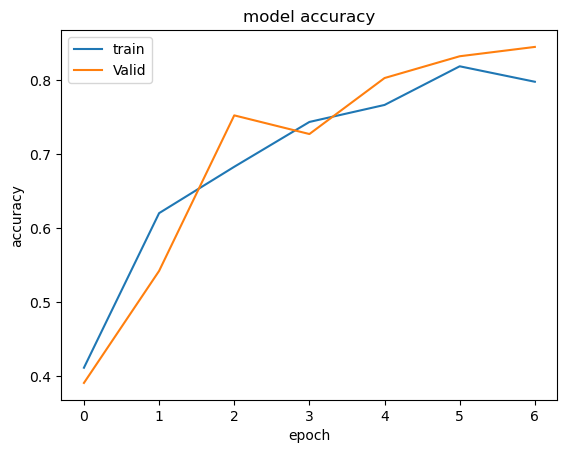

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper left')
plt.show()

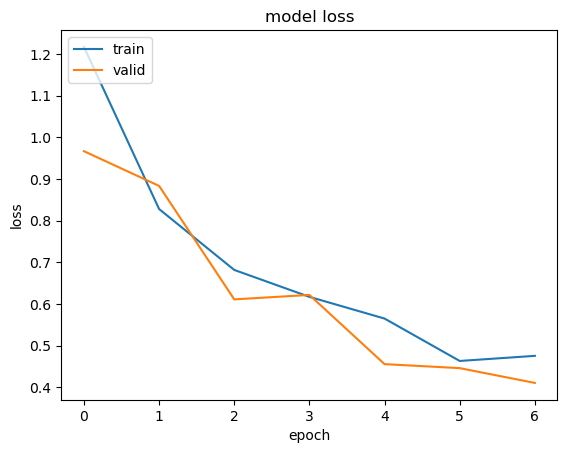

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Step [4:2]: ResNet50 Model

In [78]:
img_height,img_width = 224,224 
num_classes = 3
base_model = ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [79]:
x1 = base_model.output
x1 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x1)
x1 = tf.keras.layers.Flatten(name="flatten_head")(x1)
x1 = tf.keras.layers.Dense(128, activation="relu", name="dense_head")(x1)
x1 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x1)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x1)

model_ResNet50 = Model(inputs=base_model.input, outputs=model_out)
model_ResNet50.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [82]:
model_ResNet50.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [81]:
history_ResNet50 =model_ResNet50.fit(training_set,epochs=7,validation_data=validation_set)

Epoch 1/7
15/15 [==============================] - 79s 3s/step - loss: 5.9766 - accuracy: 0.3852 - val_loss: 1.1021 - val_accuracy: 0.2479
Epoch 2/7
15/15 [==============================] - 38s 3s/step - loss: 1.3291 - accuracy: 0.4019 - val_loss: 1.0978 - val_accuracy: 0.3908
Epoch 3/7
15/15 [==============================] - 38s 3s/step - loss: 1.0663 - accuracy: 0.3883 - val_loss: 1.0970 - val_accuracy: 0.3908
Epoch 4/7
15/15 [==============================] - 38s 3s/step - loss: 1.0529 - accuracy: 0.4426 - val_loss: 1.0965 - val_accuracy: 0.3613
Epoch 5/7
15/15 [==============================] - 38s 3s/step - loss: 0.9817 - accuracy: 0.5052 - val_loss: 1.0962 - val_accuracy: 0.3613
Epoch 6/7
15/15 [==============================] - 38s 3s/step - loss: 0.9901 - accuracy: 0.4906 - val_loss: 1.0959 - val_accuracy: 0.3613
Epoch 7/7
15/15 [==============================] - 37s 2s/step - loss: 0.9883 - accuracy: 0.4864 - val_loss: 1.0957 - val_accuracy: 0.3613


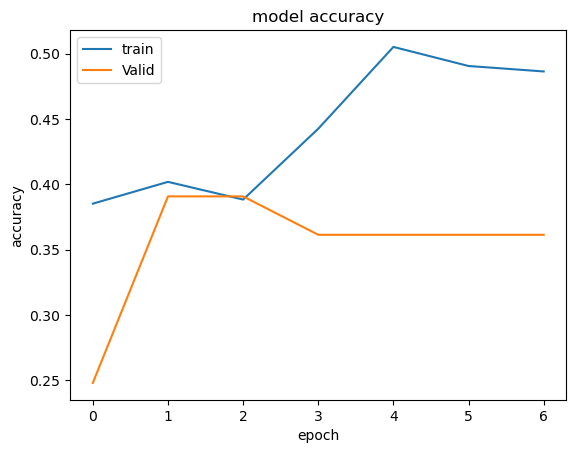

In [83]:
plt.plot(history_ResNet50.history['accuracy'])
plt.plot(history_ResNet50.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper left')
plt.show()

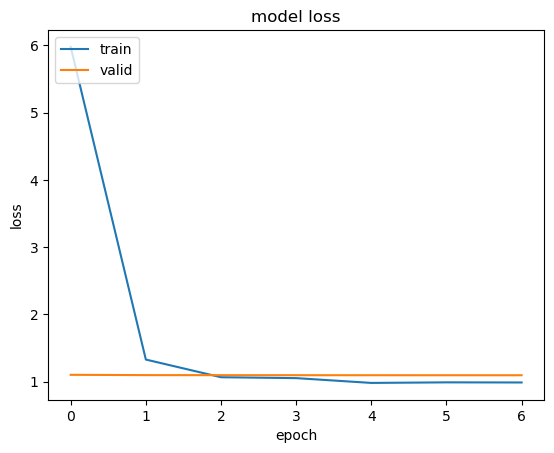

In [84]:
plt.plot(history_ResNet50.history['loss'])
plt.plot(history_ResNet50.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Step [4:3]: vgg-19 Model 

In [33]:
import tensorflow as tf 
pretrained_vgg = tf.keras.applications.VGG16(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)

for layer in pretrained_vgg.layers:
    layer.trainable = False

In [34]:
x1 = pretrained_vgg.output
x1 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x1)
x1 = tf.keras.layers.Flatten(name="flatten_head")(x1)
x1 = tf.keras.layers.Dense(128, activation="relu", name="dense_head")(x1)
x1 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x1)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x1)

model_vgg = Model(inputs=pretrained_vgg.input, outputs=model_out)
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=3, verbose=0)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0)

In [35]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [28]:
his =model_vgg.fit(training_set,epochs=10,batch_size = BATCH_SIZE,validation_data=validation_set,callbacks=[lr_reduce, es_callback])

Epoch 1/10
15/15 [==============================] - 75s 4s/step - loss: 0.9476 - accuracy: 0.6148 - val_loss: 0.5024 - val_accuracy: 0.8109 - lr: 0.0010
Epoch 2/10
15/15 [==============================] - 37s 2s/step - loss: 0.5029 - accuracy: 0.8058 - val_loss: 0.3455 - val_accuracy: 0.9244 - lr: 0.0010
Epoch 3/10
15/15 [==============================] - 36s 2s/step - loss: 0.3617 - accuracy: 0.8612 - val_loss: 0.3034 - val_accuracy: 0.9034 - lr: 0.0010
Epoch 4/10
15/15 [==============================] - 36s 2s/step - loss: 0.2975 - accuracy: 0.9144 - val_loss: 0.2363 - val_accuracy: 0.9412 - lr: 0.0010
Epoch 5/10
15/15 [==============================] - 36s 2s/step - loss: 0.2611 - accuracy: 0.9144 - val_loss: 0.2307 - val_accuracy: 0.9370 - lr: 0.0010
Epoch 6/10
15/15 [==============================] - 37s 2s/step - loss: 0.2804 - accuracy: 0.9113 - val_loss: 0.2444 - val_accuracy: 0.9076 - lr: 0.0010
Epoch 7/10
15/15 [==============================] - 36s 2s/step - loss: 0.2457 - a

In [36]:
his =model_vgg.fit(training_set,epochs=10,batch_size = BATCH_SIZE,validation_data=validation_set,callbacks=[early_stop])

Epoch 1/10
15/15 [==============================] - 41s 3s/step - loss: 0.9166 - accuracy: 0.5668 - val_loss: 0.5908 - val_accuracy: 0.7311
Epoch 2/10
15/15 [==============================] - 37s 2s/step - loss: 0.4609 - accuracy: 0.8330 - val_loss: 0.3175 - val_accuracy: 0.9160
Epoch 3/10
15/15 [==============================] - 37s 2s/step - loss: 0.3215 - accuracy: 0.8841 - val_loss: 0.2772 - val_accuracy: 0.9160
Epoch 4/10
15/15 [==============================] - 36s 2s/step - loss: 0.2817 - accuracy: 0.9071 - val_loss: 0.2526 - val_accuracy: 0.9286
Epoch 5/10
15/15 [==============================] - 37s 3s/step - loss: 0.2524 - accuracy: 0.9081 - val_loss: 0.2306 - val_accuracy: 0.9202
Epoch 6/10
15/15 [==============================] - 37s 2s/step - loss: 0.2245 - accuracy: 0.9248 - val_loss: 0.2201 - val_accuracy: 0.9244
Epoch 7/10
15/15 [==============================] - 39s 3s/step - loss: 0.2262 - accuracy: 0.9311 - val_loss: 0.2146 - val_accuracy: 0.9370
Epoch 8/10
15/15 [==

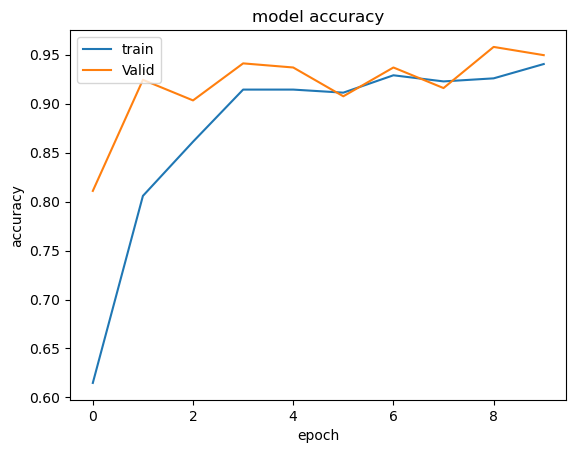

In [31]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper left')
plt.show()

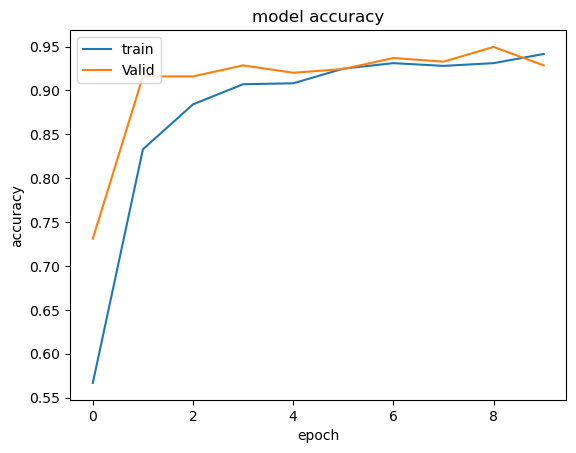

In [37]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper left')
plt.show()

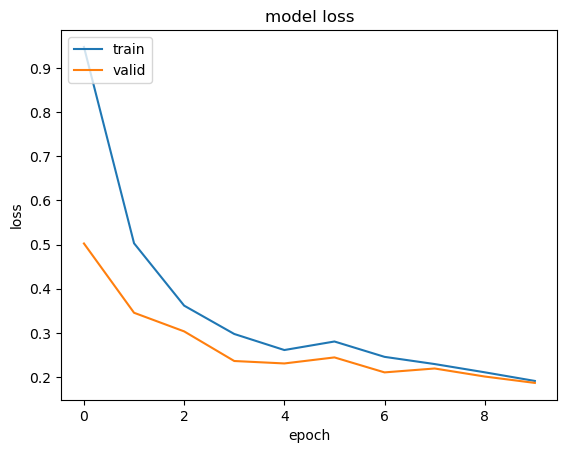

In [32]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

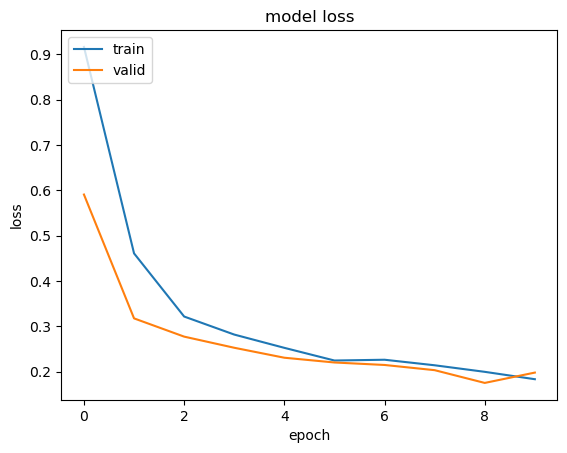

In [38]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# Step [4:4]: DenseNet Model

In [61]:
pretrained_densenet = tf.keras.applications.DenseNet201(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)

for layer in pretrained_densenet.layers:
    layer.trainable = False

x1 = pretrained_densenet.output
x1 = tf.keras.layers.AveragePooling2D(name="averagepooling2d_head")(x1)
x1 = tf.keras.layers.Flatten(name="flatten_head")(x1)
x1 = tf.keras.layers.Dense(64, activation="relu", name="dense_head")(x1)
x1 = tf.keras.layers.Dropout(0.5, name="dropout_head")(x1)
model_out = tf.keras.layers.Dense(3, activation='softmax', name="predictions_head")(x1)

In [ ]:
model_densenet = Model(inputs=pretrained_densenet.input, outputs=model_out)
model_densenet.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())

In [62]:
model_densenet2 = Model(inputs=pretrained_densenet.input, outputs=model_out)
model_densenet2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())

In [40]:
his_dense =model_densenet.fit(training_set,epochs=10,batch_size = BATCH_SIZE,validation_data=validation_set,callbacks=[early_stop])

Epoch 1/10
15/15 [==============================] - 65s 3s/step - loss: 2.1481 - accuracy: 0.6608 - val_loss: 0.5888 - val_accuracy: 0.8151
Epoch 2/10
15/15 [==============================] - 37s 2s/step - loss: 0.4637 - accuracy: 0.8507 - val_loss: 0.2735 - val_accuracy: 0.9160
Epoch 3/10
15/15 [==============================] - 38s 3s/step - loss: 0.3116 - accuracy: 0.8904 - val_loss: 0.2563 - val_accuracy: 0.8992
Epoch 4/10
15/15 [==============================] - 37s 2s/step - loss: 0.2505 - accuracy: 0.9207 - val_loss: 0.2287 - val_accuracy: 0.9160
Epoch 5/10
15/15 [==============================] - 36s 2s/step - loss: 0.2417 - accuracy: 0.9092 - val_loss: 0.2362 - val_accuracy: 0.9244
Epoch 6/10
15/15 [==============================] - 37s 3s/step - loss: 0.2179 - accuracy: 0.9175 - val_loss: 0.2517 - val_accuracy: 0.9160


In [63]:
his_dense2 =model_densenet2.fit(training_set,epochs=10,batch_size = BATCH_SIZE,validation_data=validation_set,callbacks=[early_stop])


Epoch 1/10
15/15 [==============================] - 53s 3s/step - loss: 1.5074 - accuracy: 0.6263 - val_loss: 0.3518 - val_accuracy: 0.8950
Epoch 2/10
15/15 [==============================] - 37s 2s/step - loss: 0.4203 - accuracy: 0.8278 - val_loss: 0.3276 - val_accuracy: 0.8739
Epoch 3/10
15/15 [==============================] - 37s 2s/step - loss: 0.3355 - accuracy: 0.8622 - val_loss: 0.2898 - val_accuracy: 0.8866
Epoch 4/10
15/15 [==============================] - 36s 2s/step - loss: 0.3357 - accuracy: 0.8633 - val_loss: 0.2564 - val_accuracy: 0.9034
Epoch 5/10
15/15 [==============================] - 36s 2s/step - loss: 0.2700 - accuracy: 0.9040 - val_loss: 0.2055 - val_accuracy: 0.9160
Epoch 6/10
15/15 [==============================] - 36s 2s/step - loss: 0.2244 - accuracy: 0.9113 - val_loss: 0.2391 - val_accuracy: 0.9244
Epoch 7/10
15/15 [==============================] - 36s 2s/step - loss: 0.2361 - accuracy: 0.9113 - val_loss: 0.2322 - val_accuracy: 0.9286


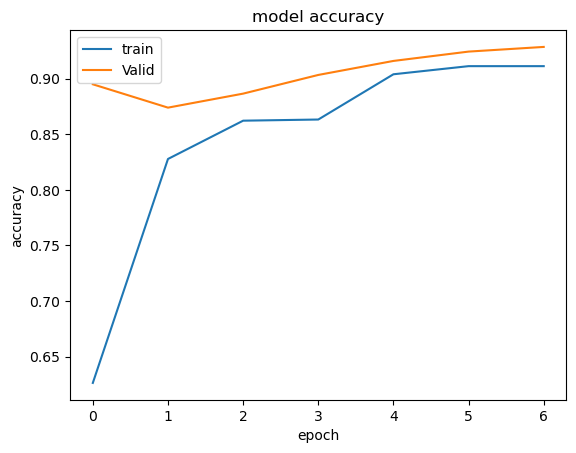

In [64]:
plt.plot(his_dense2.history['accuracy'])
plt.plot(his_dense2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper left')
plt.show()

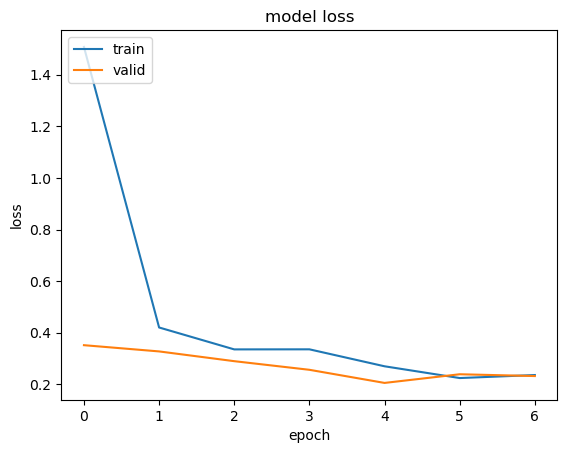

In [65]:
plt.plot(his_dense2.history['loss'])
plt.plot(his_dense2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [67]:
for i in os.listdir('/kaggle/input/shai-level-2-training-2023/test'):
    x = cv2.imread('/kaggle/input/shai-level-2-training-2023/test/'+i, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = cv2.resize(x, (224, 224))
    x=x/255
    x=np.expand_dims(x,axis=0)
    predict=model_densenet.predict(x)
    df['Label'][df['Image']==i]=str(Ln.inverse_transform([np.argmax(predict)])[0])

1/1 [==============================] - 0s 48ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1/1 [==============================] - 0s 47ms/step


In [68]:
df.to_csv('submission.csv')

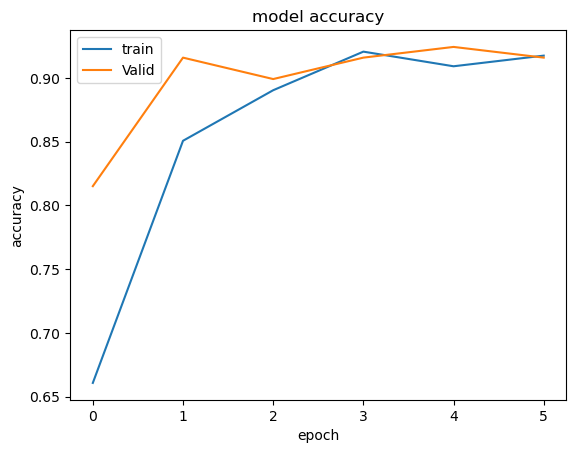

In [41]:
plt.plot(his_dense.history['accuracy'])
plt.plot(his_dense.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper left')
plt.show()

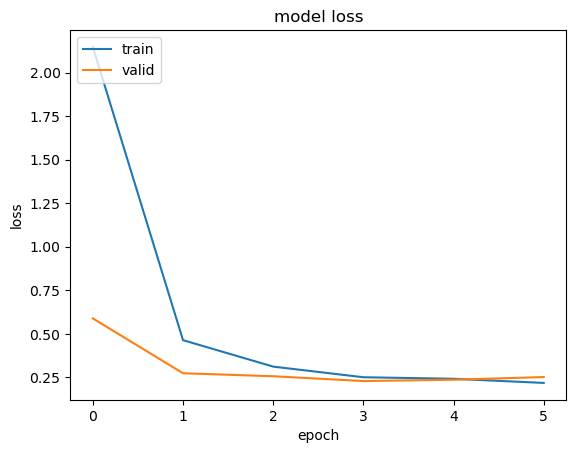

In [42]:
plt.plot(his_dense.history['loss'])
plt.plot(his_dense.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [66]:
df=pd.read_csv('/kaggle/input/shai-level-2-training-2023/sample_submission.csv')


In [45]:
for i in os.listdir('/kaggle/input/shai-level-2-training-2023/test'):
    x = cv2.imread('/kaggle/input/shai-level-2-training-2023/test/'+i, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = cv2.resize(x, (224, 224))
    x=x/255
    x=np.expand_dims(x,axis=0)
    predict=model_densenet.predict(x)
    df['Label'][df['Image']==i]=str(Ln.inverse_transform([np.argmax(predict)])[0])

1/1 [==============================] - 0s 48ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1/1 [==============================] - 0s 43ms/step


In [46]:
df.to_csv('sample_submission.csv')